In [1]:
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Convenience functions.  This can be found on the course github
#from functions import *

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
dataset = pd.read_csv("ModelData.csv")

In [10]:
dataset

,c,r,f,s,cus,over new
0,7,7,5,8,7,70.000
1,10,8,8,9,10,90.000
2,10,9,7,8,9,80.000
3,10,8,6,7,9,80.000
4,6,9,6,6,9,70.000
...,...,...,...,...,...,...
201,8,6,2,5,6,55.000
202,8,5,4,8,8,60.000
203,8,7,3,8,8,70.000
204,8,8,2,8,9,73.125


In [11]:
dataset.columns

Index(['c', 'r', 'f', 's', 'cus', 'over new'], dtype='object')

In [12]:
# Split into input and output features
y = dataset['over new']
X = dataset[['c', 'r', 'f', 's', 'cus']]

In [13]:
X.head()

,c,r,f,s,cus
0,7,7,5,8,7
1,10,8,8,9,10
2,10,9,7,8,9
3,10,8,6,7,9
4,6,9,6,6,9


In [14]:
y.head()

0    70.0
1    90.0
2    80.0
3    80.0
4    70.0
Name: over new, dtype: float64

In [15]:
# Inspect descriptive stats
dataset.describe()

,c,r,f,s,cus,over new
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,7.533981,6.956311,5.189320,7.490291,7.218447,67.891383
std,1.873125,2.116839,1.732919,2.163422,2.298642,13.272201
min,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,7.000000,6.000000,4.000000,7.000000,6.000000,60.000000
50%,8.000000,7.000000,5.000000,8.000000,8.000000,70.000000
75%,9.000000,8.000000,6.000000,9.000000,9.000000,77.343750
max,10.000000,10.000000,8.000000,10.000000,10.000000,95.000000


In [16]:
X.shape

(206, 5)

In [17]:
y.shape

(206,)

In [18]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [19]:
X

,c,r,f,s,cus
0,0.666667,0.666667,0.571429,0.777778,0.666667
1,1.000000,0.777778,1.000000,0.888889,1.000000
2,1.000000,0.888889,0.857143,0.777778,0.888889
3,1.000000,0.777778,0.714286,0.666667,0.888889
4,0.555556,0.888889,0.714286,0.555556,0.888889
...,...,...,...,...,...
201,0.777778,0.555556,0.142857,0.444444,0.555556
202,0.777778,0.444444,0.428571,0.777778,0.777778
203,0.777778,0.666667,0.285714,0.777778,0.777778
204,0.777778,0.777778,0.142857,0.777778,0.888889


In [20]:
# Build models
# Split into test and training sets
test_size = 0.2
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
# Create multiple models, fit them and check them
# Create and check a number of models
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_train)
predictions

array([84.30366303, 65.28550235, 78.9587416 , 36.86361749, 48.51442078,
       77.59811053, 79.34011896, 75.37585521, 67.70501634, 58.0916193 ,
       46.65857253, 62.55709903, 75.27910703, 83.76355896, 43.94293492,
       68.27603995, 62.92138932, 75.7738803 , 77.82149157, 61.23923806,
       43.94293492, 63.64880159, 75.97464672, 56.8880694 , 57.03061961,
       75.27910703, 65.58945966, 70.7858594 , 64.57858793, 72.51627642,
       68.77055864, 81.22117443, 56.12670108, 69.93206884, 65.5393317 ,
       77.1323946 , 73.20372785, 36.86361749, 54.88297367, 83.22510045,
       81.88414903, 40.96363721, 79.34011896, 75.37585521, 77.81504886,
       82.16410075, 83.22510045, 84.60973711, 76.55492828, 39.62268579,
       65.28550235, 75.37585521, 77.81504886, 75.2028567 , 75.03816311,
       65.83040358, 73.32063152, 36.86361749, 29.48700214, 24.83714917,
       78.9587416 , 71.92955214, 37.92461719, 69.63455424, 65.04455843,
       43.94293492, 73.73621949, 43.77473358, 66.09630017, 66.09

In [22]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, predictions))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, predictions))

Mean squared error (MSE): 24.04
Coefficient of determination (R^2): 0.87


In [40]:
type(model).__name__, mean_absolute_error(Y_train, predictions)

NameError: name 'mean_absolute_error' is not defined

In [1]:
# Evaluate the models
predictions = model.predict(X_test)
type(model).__name__, mean_absolute_error(Y_test, predictions)

NameError: name 'model' is not defined

In [27]:
# See predictions made
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
print(df)

            c         r         f         s       cus  Prediction  Actual  \
78   0.666667  0.222222  0.571429  0.777778  0.333333   58.429787  66.875   
97   0.555556  0.888889  0.714286  0.555556  0.888889   69.847730  70.000   
152  0.888889  0.777778  0.285714  0.777778  0.777778   67.705016  65.000   
44   0.888889  0.666667  0.714286  0.888889  0.777778   75.038163  80.000   
40   0.777778  0.666667  0.571429  0.666667  0.444444   64.777492  60.000   
67   0.888889  0.666667  0.714286  1.000000  0.777778   77.085774  73.125   
98   0.777778  0.666667  0.714286  0.888889  0.666667   73.040680  68.125   
18   0.666667  0.222222  0.428571  0.111111  0.666667   46.658573  55.000   
153  0.666667  0.222222  0.571429  0.888889  1.000000   66.096300  60.000   
62   0.777778  0.555556  0.142857  0.444444  0.555556   53.134301  55.000   
4    0.555556  0.888889  0.714286  0.555556  0.888889   69.847730  70.000   
173  1.000000  0.666667  1.000000  1.000000  1.000000   84.609737  90.000   

In [28]:
# Interpret model
# Intepret linear regression model

In [29]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, predictions))
print('Coefficient of determination (R^2): %.2f'% r2_score(Y_test, predictions))

Coefficients: [ 9.54899728 14.39512395 16.06498533 18.42850144  8.42835249]
Intercept: 22.5421512684862
Mean squared error (MSE): 24.89
Coefficient of determination (R^2): 0.82


In [30]:
linearRegressionSummary(model, X.columns)

NameError: name 'linearRegressionSummary' is not defined

In [31]:
# String formatting
# By default r2_score returns a floating number
r2s = r2_score(Y_test, predictions)
print(r2s)
r2s.dtype

0.8187415304876223


dtype('float64')

In [32]:
# Scatter plots
# Import library
import seaborn as sns

In [33]:
# Make scatter plot
Y_test

78     66.875
97     70.000
152    65.000
44     80.000
40     60.000
67     73.125
98     68.125
18     55.000
153    60.000
62     55.000
4      70.000
173    90.000
145    53.125
38     60.000
29     80.000
171    45.000
191    75.000
33     75.000
180    70.000
190    68.125
174    80.000
31     60.000
11     80.000
119    80.000
186    50.000
34     60.000
84     75.000
185    60.000
120    75.000
35     75.000
150    75.000
28     89.375
16     65.000
130    39.375
116    77.500
183    40.000
27     80.000
47     70.000
58     76.875
205    65.000
189    72.500
106    65.000
Name: over new, dtype: float64

In [34]:
np.array(Y_test)

array([66.875, 70.   , 65.   , 80.   , 60.   , 73.125, 68.125, 55.   ,
       60.   , 55.   , 70.   , 90.   , 53.125, 60.   , 80.   , 45.   ,
       75.   , 75.   , 70.   , 68.125, 80.   , 60.   , 80.   , 80.   ,
       50.   , 60.   , 75.   , 60.   , 75.   , 75.   , 75.   , 89.375,
       65.   , 39.375, 77.5  , 40.   , 80.   , 70.   , 76.875, 65.   ,
       72.5  , 65.   ])

In [35]:
predictions

array([58.42978723, 69.84773025, 67.70501634, 75.03816311, 64.77749214,
       77.08577438, 73.0406798 , 46.65857253, 66.09630017, 53.13430128,
       69.84773025, 84.60973711, 53.13430128, 55.32234598, 73.89447037,
       34.53323926, 76.55492828, 73.4788824 , 71.41509922, 73.0406798 ,
       73.89447037, 62.55709903, 79.86910284, 79.86910284, 57.03061961,
       65.5393317 , 68.54743217, 54.88297367, 75.37585521, 75.12846858,
       79.38077229, 82.31473921, 72.49577857, 43.94293492, 76.55492828,
       36.86361749, 74.22455005, 63.83936299, 79.57158825, 67.70501634,
       74.43772606, 54.90325025])

C:\Users\Dell\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='over new'>

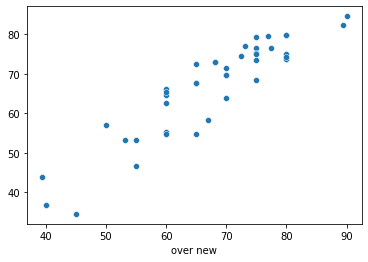

In [36]:
sns.scatterplot(Y_test, predictions)

C:\Users\Dell\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='over new'>

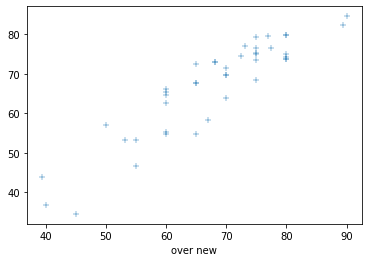

In [37]:
sns.scatterplot(Y_test, predictions, marker="+")

In [43]:
sns.scatterplot(Y_test, predictions, alpha=0.5)

C:\Users\Dell\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: array length 164 does not match index length 42

In [48]:
df = pd.read_csv('ModelData.csv')

In [49]:
df

,c,r,f,s,cus,over new
0,7,7,5,8,7,70.000
1,10,8,8,9,10,90.000
2,10,9,7,8,9,80.000
3,10,8,6,7,9,80.000
4,6,9,6,6,9,70.000
...,...,...,...,...,...,...
201,8,6,2,5,6,55.000
202,8,5,4,8,8,60.000
203,8,7,3,8,8,70.000
204,8,8,2,8,9,73.125


In [51]:
#separate the other attributes from the predicting attribute
x = df.drop('over new',axis=1)
#separte the predicting attribute into Y for model training 
y = ['over new']

In [53]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [206, 1]